In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import validation_curve
# Models
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Define DataFrame
cropRecommendationA2=pd.read_csv("../../../../preprocessedData/CropRecommentationApproach2.csv")

In [3]:
features=cropRecommendationA2[["N","P","K","temperature","humidity","rainfall"]]
target=cropRecommendationA2["label"]

In [4]:
# Normalization
normalizer=Normalizer()
normalizer.fit(features)
features=normalizer.transform(features)

In [5]:
# Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.1,random_state=2)

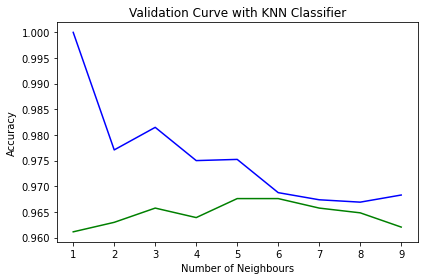

In [6]:
parameter_range = np.arange(1, 10, 1) 
train_score, test_score = validation_curve(KNeighborsClassifier(n_neighbors=5), X_train, Y_train, param_name = "n_neighbors",param_range = parameter_range,scoring = "accuracy",cv=5)
mean_train_score = np.mean(train_score, axis = 1) 
std_train_score = np.std(train_score, axis = 1) 
  
mean_test_score = np.mean(test_score, axis = 1) 
std_test_score = np.std(test_score, axis = 1) 
  
plt.plot(parameter_range, mean_train_score,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_score, 
   label = "Cross Validation Score", color = 'g') 
  
plt.title("Validation Curve with KNN Classifier") 
plt.xlabel("Number of Neighbours") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.show()

In [7]:
# Training
KNeighbors=KNeighborsClassifier(n_neighbors=6)
KNeighbors.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [8]:
# Testing
predicted_values=KNeighbors.predict(X_test)
predicted_values

array(['jute', 'banana', 'rice', 'papaya', 'rice', 'coffee', 'grapes',
       'jute', 'apple', 'papaya', 'maize', 'blackgram', 'orange',
       'papaya', 'apple', 'blackgram', 'blackgram', 'jute', 'apple',
       'lentil', 'coffee', 'banana', 'grapes', 'papaya', 'banana', 'jute',
       'banana', 'lentil', 'blackgram', 'rice', 'orange', 'apple',
       'coffee', 'mango', 'grapes', 'jute', 'banana', 'coffee', 'papaya',
       'mango', 'jute', 'lentil', 'grapes', 'lentil', 'jute', 'grapes',
       'papaya', 'banana', 'lentil', 'banana', 'lentil', 'orange', 'jute',
       'grapes', 'blackgram', 'lentil', 'apple', 'maize', 'banana',
       'jute', 'orange', 'banana', 'jute', 'blackgram', 'coffee', 'jute',
       'mango', 'apple', 'banana', 'jute', 'lentil', 'mango', 'mango',
       'jute', 'banana', 'banana', 'rice', 'mango', 'papaya', 'lentil',
       'orange', 'papaya', 'coffee', 'rice', 'rice', 'mango', 'orange',
       'papaya', 'grapes', 'jute', 'mango', 'lentil', 'papaya', 'mango',
 

In [9]:
# Accuracy
accuracy_score=metrics.accuracy_score(Y_test, predicted_values)
print("Crop Recommendation Accuracy:",accuracy_score)

Crop Recommendation Accuracy: 0.9416666666666667


In [10]:
# Cross Validation Score
cross_val_score=cross_val_score(KNeighbors,features,target,cv=5)
print("Crop Validation Score: ",*cross_val_score)

Crop Validation Score:  0.9416666666666667 0.9666666666666667 0.95 0.975 0.9416666666666667


In [11]:
# Classofication Report
print(classification_report(Y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         7
      banana       0.92      1.00      0.96        11
   blackgram       1.00      1.00      1.00        12
      coffee       1.00      1.00      1.00         7
      grapes       1.00      1.00      1.00         8
        jute       0.62      1.00      0.77        10
      lentil       1.00      1.00      1.00        12
       maize       1.00      0.86      0.92         7
       mango       1.00      1.00      1.00        11
      orange       1.00      1.00      1.00         9
      papaya       1.00      0.80      0.89        15
        rice       1.00      0.73      0.84        11

    accuracy                           0.94       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.94      0.94       120

